# 알집 풀기 

In [1]:
from zipfile import ZipFile

with ZipFile('all_train.zip', 'r') as zip:
    zip.extractall()

In [2]:
with ZipFile("all_test.zip", 'r') as zip:
    zip.extractall()

# 데이터 불러오기

In [3]:
import os
import glob

In [4]:
train_dir = os.getenv("HOME") + "/aiffel/aiffel_project/fianl_model_train_all_data/all_train/*"
test_dir = os.getenv("HOME") + "/aiffel/aiffel_project/fianl_model_train_all_data/all_test/*"

print(train_dir)
print(test_dir)

/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_train/*
/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_test/*


In [5]:
train_list = glob.glob(train_dir)
test_list = glob.glob(test_dir)

print("훈련 데이터 리스트")
print(train_list[:5])
print("\n")
print("테스트 데이터 리스트")
print(test_list[:5])

훈련 데이터 리스트
['/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_train/▒█┴■▒Γ_░φ╡ε_1╟╨│Γ_ESSAY_66134.json', '/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_train/┤δ╛╚┴ª╜├_┴▀╡ε_1╟╨│Γ_ESSAY_69269.json', '/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_train/╝│╕φ▒█_┴▀╡ε_2╟╨│Γ_ESSAY_54110.json', '/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_train/╝│╕φ▒█_░φ╡ε_3╟╨│Γ_ESSAY_64358.json', '/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_train/┬∙╝║╣▌┤δ_┴▀╡ε_3╟╨│Γ_ESSAY_82563.json']


테스트 데이터 리스트
['/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_test/╝│╕φ▒█_░φ╡ε_1╟╨│Γ_ESSAY_35026.json', '/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_test/┴╓└σ_░φ╡ε_2╟╨│Γ_ESSAY_85982.json', '/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_test/▒█┴■▒Γ_░φ╡ε_2╟╨│Γ_ESSAY_79392.json', '/aiffel/aiffel/aiffel_project/fianl_model_train_all_data/all_test/┬∙╝║╣▌┤δ_┴▀╡ε_3╟╨│Γ_ESSAY_72972.json', '/aiffel/aiffel/aiffel_proje

# 데이터 전처리

In [6]:
train_corpus = []

import json

for file in train_list:
    with open(file, 'r') as f:
        json_file = json.load(f)
        only_txt = json_file['essay_txt']
        only_txt = only_txt.replace("#@문장구분#", "")
        only_txt = only_txt.replace("\b", "")
        only_txt = only_txt.replace("\n", "")
        train_corpus.append(only_txt)
        
print(train_corpus[:3])

['우리는 살면서 아주 당연하게 생각하고 있는 것들이 있습니다. 그러나 당연하다고 여겼던 것이 알고 보니 정말이지 소중하고 중요한 존재였다는 것을 뒤늦게 깨닫곤 합니다. 소중한 것은 너무나도 많지만 그 중 한 가지 예는 바로 병원에서 볼수 있습니다. 바로, 사람의 건강이라고 할 수 있겠습니다. 건강 할 때에는 건강의 소중함에 대해 알지 못합니다. 당연히 누려야 할 권리라고 생각합니다. 그런데 어느 날 허리라도 아픈 상황이 찾아온다면? 의자에 앉아 있는 것도 곤욕이고 서서 어딘가 움직이는 것도 힘들 수 있습니다. 하루 종일 누워서 생활하다 보면 비로소 건강이 얼마나 중요한지 깨달을 수 있습니다. 우리는 건강의 소중함에 대해 뼈저리게 느끼는 일이 평소에 없습니다. 건강할 때 건강을 챙기는 현명한 모습을 보였으면 합니다. 건강을 챙긴다는 것에 의미는 두 가지가 있을 것입니다. 하나는 애초에 문제가 생기지 않게 잘하는 것이고 또 하나는 문제가 생기게 되었을 때, 더 큰 문제로 번지지 않게 빠르게 진압하는 것입니다. 노화는 자연스러운 현상이므로 배제하고, 모두가 공평한 상황에서 갑작스럽게 건강에 찾아올 수 있는 위기 상황으로는 교통사고가 대표적일 것입니다. 갑자기 사고라도 당하게 되면 우리의 건강은 크게 흔들릴 것입니다. 말 그대로 갑작스럽게 건강에 적신호가 켜지는 것입니다. 당장에는 별 문제 없다가 서서히 나타나 점점 심해지는 경우도 있습니다. 건강이 우리의 가장 소중한 것입니다. 그래야 소중한 것을 잃지 않습니다.', '저희 대한민국의 한류문화를 중국으로부터 지키기 위해서는 강력한 맞대응을 해야한다고 생각합니다. 우리나라 높은 분들은 마음이 약한 것인지 중국이 저렇게 버릇없게 나오는데도 아무런 대응을 하지 못하고 국민들에게 의존하고 있습니다. 국민들은 열불을 내면서 중국을 비판하고 뭐라하는데 막상 나라의 높은 사람들이 가만히 있으니까 중국이 더 판을 치는 것 같습니다. 중국으로부터 우리나라의 전통 문화를 지키기 위해서는 중국의 것이 아닌 우리나라의 전통 문화라는 것

In [7]:
train_data = ' '.join(map(str, train_corpus))
train_data[:100]

'우리는 살면서 아주 당연하게 생각하고 있는 것들이 있습니다. 그러나 당연하다고 여겼던 것이 알고 보니 정말이지 소중하고 중요한 존재였다는 것을 뒤늦게 깨닫곤 합니다. 소중한 것은 '

In [8]:
test_corpus = []

for file in test_list:
    with open(file, 'r') as f:
        json_file = json.load(f)
        only_txt = json_file['essay_txt']
        only_txt = only_txt.replace("#@문장구분#", "")
        only_txt = only_txt.replace("\b", "")
        only_txt = only_txt.replace("\n", "")
        test_corpus.append(only_txt)
        
print(test_corpus[:3])

['흔히 미적분이라고 하면 교과서에 있는 재미없는 떠올리기 쉽상이다. 하지만 이책은 달랐다. 이책에서는 생활 속에서의 많은 부분을수학과 관련지어 나타냈다. 커피속에서도 고속도수로속에서도 심지어는 밤하늘에서도 미적분을 발견하기도 하며 하루 하루 겪는 일들을 통하여 일상속에서 숨어 있는 미적분을 찾아내었다. 처음 책을 읽을때는 미적분을 잘몰라 이해하기 어려울거라고 생각했다. 하지만 책에서는 각 개념을 일상생활의 예시로 들어 쉽게 설명해주었고 미적분은 모르지만 책에서는 미적분만 다룬것이아니라 함수와도함수 극한 등 우리가 배운것도 일상생활에서 찾아내 생각보다 어렵지 않게 느끼고 책을 읽을 수 있었다.책에서는 많은 흥미로운 내용이많았다. 우리는 삼각함수 모형에 따른 숙면을 취하고, 교통체증의 이유, 집으로 돌아가는 최적의 길,영화관에서 간격, 의자의 높이,스크린 까지의 거리, 스크린의 높이등을 고려해 최적의 자리를 찾을 수 있고 물리학에서는 적분을 통해 아인슈타인의 중력파이론,르메트르의 우주의 팽창, 우주의 나이등을 알 수 있었다. 이외에도 일상에는 많은 수학이 숨어있었는데 라디오 소리는 사실 압력파의로그함수를 듣는 것이고 우리가 바라보는 빛은 실제로 전자기파의 삼각함수를 보는것과 같다고 한다. 이책을 통해 교과서로 배운 삼각함수 로그함수 미분 적분이 어렵다고만 느껴졌었는데 이책에서 말해주는 일상의 수학은 어렵지않고 쉽게 이해 할 수 있었다. 가장신기한 부분은 우리가 함수를 들을 수 있다는 부분에서 흥미로웠다. 함수는 단지 그래프를 그리고 식을 알기 위해서 배우는 줄 알았는데 이책을 읽어보며 내 주변에도 많은 부분이 수학과 관련되어 있다는 것을 알게되었다. 중간 중간마다 식을 전개하면서 배우지않은부분이 있었지만 그래도 일상생활과 관련되어 있어 신기했다.', "전세계적인 백신 생산체계를 갖추는 것은 코로나19가 종식된 이후에도 중요하다. 이미 지구촌은 코로나19 전에 메르스, 싸스라는 전염병의 대유행을 겪었다. 바이러스 창궐은 주기적 양상을 보이고 있고 외국여행을 이웃집

In [9]:
test_data = ' '.join(map(str, test_corpus))
print(test_data[:100])

흔히 미적분이라고 하면 교과서에 있는 재미없는 떠올리기 쉽상이다. 하지만 이책은 달랐다. 이책에서는 생활 속에서의 많은 부분을수학과 관련지어 나타냈다. 커피속에서도 고속도수로속에서


# 사전 훈련된 모델 불러오기

In [10]:
from transformers import PreTrainedTokenizerFast, AutoModelWithLMHead

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                   bos_token="</s>",
                                                   eos_token="</s>",
                                                   unk_token="<unk>",
                                                   pad_token="<pad>",
                                                   mask_token="<mask")

model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")

Downloading:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:660: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Downloading:   0%|          | 0.00/490M [00:00<?, ?B/s]

# 토크나이저 함수

In [11]:
!pip install fastai

import fastai
from fastai.text.all import *
import torch

     |████████████████████████████████| 232 kB 6.6 MB/s            
     |████████████████████████████████| 6.6 MB 89.1 MB/s            
     |████████████████████████████████| 67 kB 9.0 MB/s             
     |████████████████████████████████| 491 kB 71.5 MB/s            
     |████████████████████████████████| 48 kB 9.1 MB/s             
     |████████████████████████████████| 128 kB 67.7 MB/s            
     |████████████████████████████████| 922 kB 88.0 MB/s            
     |████████████████████████████████| 3.2 MB 76.3 MB/s            
     |████████████████████████████████| 181 kB 85.0 MB/s            
     |████████████████████████████████| 10.2 MB 66.6 MB/s            
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beha

In [12]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
        
    def encodes(self, x):
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    
    def decodes(self, x):
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [13]:
splits =[[0], [1]]

tls = TfmdLists([train_data, test_data], TransformersTokenizer(tokenizer), 
                splits=splits, dl_type=LMDataLoader)
batch, seq_len = 8, 256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)

# 모델 학습

SuggestedLRs(valley=4.365158383734524e-05)


epoch,train_loss,valid_loss,perplexity,time
0,5.045368,5.036009,153.854721,18:45


epoch,train_loss,valid_loss,perplexity,time
0,4.073796,4.561238,95.701866,18:46
1,3.912939,4.444392,85.148071,18:50
2,3.404622,4.309067,74.371048,18:55
3,2.780066,4.290527,73.004921,19:01
4,2.366638,4.365911,78.721046,19:08


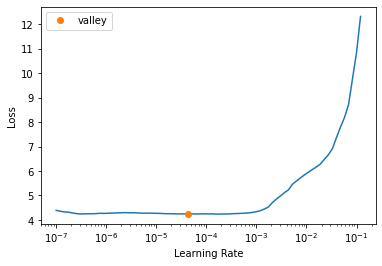

In [14]:
class DropOutput(Callback):
    def after_pred(self):
        self.learn.pred = self.pred[0]
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput],
               metrics=Perplexity()).to_fp16()
lr = learn.lr_find()
print(lr)
learn.fine_tune(5)

# 문장 생성

In [15]:
prompt = "한국의 몇몇 연예인들은 동북공정을 인정하지 않고 sns와 해외 방송등 에서 김장을 하거나 한복을 입고,"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                            max_length=128,
                            pad_token_id=tokenizer.pad_token_id,
                            eos_token_id=tokenizer.eos_token_id,
                            bos_token_id=tokenizer.bos_token_id,
                            repetition_penalty=2.0,
                            use_cache=True)
src_input = tokenizer.decode(preds[0].cpu().numpy())
print(src_input)

한국의 몇몇 연예인들은 동북공정을 인정하지 않고 sns와 해외 방송등 에서 김장을 하거나 한복을 입고, 일상생활 속으로 중국꺼를 왜곡하고 있다. 이러한 행동들이 계속 우리 사회에 만연하게 퍼져나가고 있다는 것을 알 수 있었다. 그래서 나는 이런 중국의 행동에 대해 적극적으로 대응해야 한다고 생각한다. 중국이 우리나라 문화를 빼앗아 가려고 하는 것은 정말 말도 안되는 소리라고 생각을 한다. 그렇기 때문에 우리는 우리의 문화에 대해서 더욱 더 관심을 가져야 하고 또 우리가 먼저 우리나라의 문화와 전통에 대한 지식을 가지고 있어야 할 것이다. 그리고 그렇게 해야만 다른 나라 사람들이 자신의 문화나 문화유산에 대하여 제대로 알고 있을 것이라고 생각이 된다. 왜냐하면 그래야지 모두가 당당하게 주장할 것이기 때문이다. 저


# BLEU Score

In [16]:
!pip install datasets

from datasets import load_metric

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [17]:
!pip install sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 118 kB 7.8 MB/s            


In [18]:
import pandas as pd
import numpy as np

In [19]:
reference = ["""한국의 몇몇 연예인들은 동북공정을 인정하지 않고 sns와 해외 방송등 에서 김장을 하거나 한복을 입고, 한국의 문화와 전통은 대한민국의 것이라고 주장한다. 이러하듯이 우리들도 우리가 쉽게 접할수 있는 sns로 한국의 문화와 전통을 세계에 알려 중국의 동북공정을 실패로 돌아가게 해야한다. 또 국제적인 자리나 세계가 주목하는 회담 또는 올림픽 대회때 한국의 문화는 한반도에서 시작해 중국 지역까지 뻤쳐 나간 것이라는 증거를 밣켜 중국이 동북공정으로 우리 대한민국의 문화를 자신들의 것이라고 우기고 있다고, 알려 이 이야기가 세계에 확산화가 돼면 un과 다른 국제 기관에 도움을 받아 동북공정은 한국의 문화와 전통을 빼앗을려 하고, 고구려, 발해의 문화가 자신들의 것이라고 우기는 중국에게 논리있게 아니라고 밝히면 우리 한류문화 열풍을 지켜낼수 있다고 생각한다."""]

In [20]:
bleu_metric = load_metric("sacrebleu")

bleu_metric.add(
    prediction=src_input, reference=reference)
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

,Value
score,15.014763
counts,"[29, 15, 13, 12]"
totals,"[109, 108, 107, 106]"
precisions,"[26.61, 13.89, 12.15, 11.32]"
bp,1.0
sys_len,109
ref_len,107


# pickle 모듈로 저장

In [24]:
import pickle

with open('all_model.pkl', 'wb') as file:
    pickle.dump(learn, file)

# 파이토치 모델 저장

In [22]:
torch.save(learn.state_dict(), "model_weights.pth")

# 파이토치 모델 저장2

In [23]:
torch.save(learn, "model.pth")

# 체크포인트 저장 

In [31]:
torch.save({
    'epoch' : 5,
    'mode_state_dict' : model.state_dict(),
    'loss' : CrossEntropyLossFlat(),
}, "check_point.tar")